##Recurrent Neural Network
Long Short-term Memory (LSTM) NN  to solve a binary sentiment analysis problem.

In [1]:
# Libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

###Dataset

In [2]:
# Download the IMDB dataset
# Set the parameter num_words which defines the most frequently used words, to 10.000 words.
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [3]:
# The actual movie reviews consisted of words and these words converted to numbers.
# Each list corresponds to a different movie review.

# Print a sample
print(X_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [4]:
# The number of samples
print(f"X_train: {len(X_train)}")
print(f"X_test: {len(X_test)}")

X_train: 25000
X_test: 25000


###Preprocessing

####Concatenate
Needed three datasets for DL training; train, validation and test datasets with a split ratio of 80-10-10.

In [5]:
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

####Padding
Since all reviews are at different lengths, padding is used to make all of them the same length.

In [6]:
X = tf.keras.preprocessing.sequence.pad_sequences(X, maxlen=1024)

####Splitting
The 80-10-10 split corresponds to 40000 - 10000 - 10000 number of samples relatively.

In [7]:
X_train = X[:40000]
y_train = y[:40000]

# Create the validation datasets
X_val = X[40000:45000]
y_val = y[40000:45000]

# Create the test datasets
X_test = X[45000:50000]
y_test = y[45000:50000]

In [8]:
# the number of samples
print(f"X_train: {len(X_train)}")
print(f"y_train: {len(y_train)}")
print(f"X_val: {len(X_val)}")
print(f"y_val: {len(y_val)}")
print(f"X_test: {len(X_test)}")
print(f"y_test: {len(y_test)}")

X_train: 40000
y_train: 40000
X_val: 5000
y_val: 5000
X_test: 5000
y_test: 5000


###Constructing the Neural Network

In [9]:
# Create a model object
model = tf.keras.Sequential()

####Embedding Layer
Word embedding is a method to represent words or text numerically.

In [10]:
model.add(tf.keras.layers.Embedding(input_dim=10000, output_dim=256))
model.add(tf.keras.layers.Dropout(0.7))

In [11]:
# Add a LSTM layer with dropout
model.add(tf.keras.layers.LSTM(256))
model.add(tf.keras.layers.Dropout(0.7))

# Add a Dense layer with dropout
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dropout(0.7))

####Output layer

In [12]:
# The number of nodes will be one since making the binary classification. 
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

####Optimizer

In [13]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

###Training the model

In [14]:
results =model.fit(X_train, y_train, epochs=5, validation_data=(X_val,y_val))

Epoch 1/5
1250/1250 [==============================] - 96s 71ms/step - loss: 0.5018 - accuracy: 0.7513 - val_loss: 0.3339 - val_accuracy: 0.8532
Epoch 2/5
1250/1250 [==============================] - 87s 69ms/step - loss: 0.3358 - accuracy: 0.8699 - val_loss: 0.3049 - val_accuracy: 0.8740
Epoch 3/5
1250/1250 [==============================] - 86s 69ms/step - loss: 0.3093 - accuracy: 0.8827 - val_loss: 0.3314 - val_accuracy: 0.8808
Epoch 4/5
1250/1250 [==============================] - 87s 70ms/step - loss: 0.2921 - accuracy: 0.8909 - val_loss: 0.2537 - val_accuracy: 0.9054
Epoch 5/5
1250/1250 [==============================] - 88s 70ms/step - loss: 0.1930 - accuracy: 0.9317 - val_loss: 0.2520 - val_accuracy: 0.9054


####Visualize the results

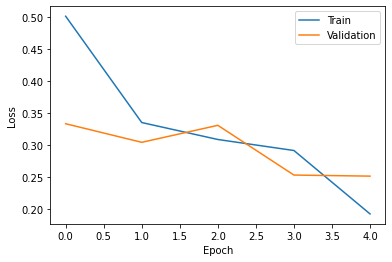

In [15]:
plt.plot(results.history["loss"], label="Train")

# Plot the the validation loss
plt.plot(results.history["val_loss"], label="Validation")

# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Loss")
# Put legend table
plt.legend()

# Show the plot
plt.show()

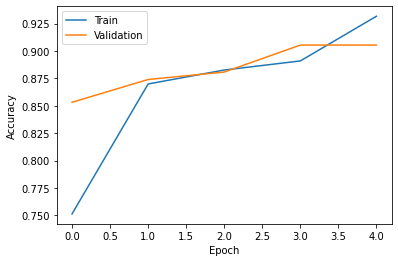

In [16]:
plt.plot(results.history["accuracy"], label="Train")

# Plot the the validation accuracy
plt.plot(results.history["val_accuracy"], label="Validation")

# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
# Put legend table
plt.legend()

# Show the plot
plt.show()

###Performance evaluation

In [17]:
model.evaluate(X_test, y_test)

157/157 [==============================] - 4s 25ms/step - loss: 0.2513 - accuracy: 0.9020


[0.2513280212879181, 0.9020000100135803]

####Try a prediction

In [18]:
# if the output is smaller than 0.5 we say it belongs to 0
prediction_result = model.predict(X_test[789].reshape(1, 1024))
print(f"Label: {y_test[789]} | Prediction: {prediction_result}")

Label: 0 | Prediction: [[0.16954884]]
